<a href="https://colab.research.google.com/github/Rogerio-mack/BIG_DATA_Analytics_Mineracao_e_Analise_de_Dados/blob/main/BIG_T7_Regras_de_Associacao_e_Filtros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **7. Aprendizado não Supervisionado: Regras de Associação e Filtros de Conteúdo**
---

Nesta trilha você vai aprender:

*   O que é e como criar modelos de Mineração de Regras de Associação  
*   As principais métricas das Regras de Associação
*   O que são e como implementar Filtros de Conteúdos para Sistemas de Recomendação

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns

# [Beer and Nappies. Baby love drinking beers?](https://bigdatabigworld.wordpress.com/2014/11/25/beer-and-nappies/)

![imagem](https://bigdatabigworld.files.wordpress.com/2014/11/e595a4e98592.jpeg?w=300&h=205)

 
<small>
<b>
Figura 1. Beer and Nappies. Baby love drinking beers?</b><br></b>(Fonte: https://bigdatabigworld.wordpress.com/2014/11/25/beer-and-nappies/)



**Regras de Associação** ou ainda **Market Basket Analysis** são é uma técnica que permite identificar relações subjacentes entre diferentes itens. Em Supermercado, por exemplo,  clientes podem comprar uma variedade de itens e normalmente podemos encontrar um padrão no que os clientes compram. Mães compram produtos para bebês, como leite e fraldas e mulheres podem comprar itens de maquiagem e produtos para limpeza de pele, e outros compram cervejas e carne para churrasco. Assim as transações envolvem um padrão.
As **Regras de Associação** permitem identificar esse padrão o que é um **aprendizado não supervisionado** sobre os dados.

Isso tem um um impacto bastante positivo para os consumidores mas também é de interesse para indústria que podem **aumentar a sua margem ofertando mais produtos** com maior mais probabilidade de conversão de vendas e também para o **planejamento da produção** de itens que são normalmente consumidos juntos.  









# Usos de Regras de Associação

Você pode imaginar que regras de associação só tenham uso para fazer a recomendação de produtos que tenham maior potencial de serem adquiridos juntos. De fato, Regras de Associação parecem ser o **primeiro modelo de Sistemas de Recomendação** depois do modelo ingênuo de **Recomendação por Popularidade** (simplesmente recomendar itens mais vendidos). Mas elas podem ir muito mais além do que isso. Identificados itens associados diversas estratégias podem ser empregadas para maximizar lucros e planejar a produção:

> * Os itens podem ser colocados juntos na loja para aumentar a chance de que o cliente adquira o outro produto.

> * Campanhas de marketing ou vendas para  pessoas que compram um dos produtos podem ser direcionadas para que o cliente compre o outro produto com maior chance de realização da venda

> * Criação de 'pacotes' dos produtos com descontos oferencendo um 'novo produto' que faz sentido para os clientes

> * Previsão da demanda associada dos produtos 

> * Otimizações da produção e estoque dos produtos. Os produtos, por exemplo, podem ser embalados ou transportados juntos, ou estocados próximos para mais fácil acesso




# Conceitos

A construção e análise de regras de associação envolve basicamente:

> * Análise de cesta de compras
>> * Construir regras de associação
>> * Identifique itens frequentemente comprados juntos

> * Regras de associação, que são da forma
>> * {antecedente} → {consequente}

Como por exemplo {ficção} → {biografia}.

Assim, basicamente trabalharemos a frequência dos itens e as regras que associam um produto a outro.

# Tipos de Regras de Associação

* Contém antecedente e consequente (ou premissa e conclusão)
> {saúde} → {culinária}
* Regra multi-antecedente
> {humor, viagem} → {idioma}
* Regra multi-conseqüente
> {biografia} → {história, idioma}
* Regra multi-antecedente e consequente
> {biografia, não ficção} → {história, linguagem}

Selecionar regras úteis é bastante difícil. O conjunto de todas as regras possíveis é bastante grande (combinatória dos valores) e a maioria das regras não serão úteis. O problema pode ser menor se nos restringirmos a regras simples (apenas um antecedente e um consequente), mas mesmo assim isso pode ser um grande desafio pois o número de regras possíveis aumenta exponencialmente. 

$$ C^n_k = \frac{n!}{k!(n-k)!} $$

No texto Tan, P.-N., *et al.* (2005) **Introduction to Data Mining**  vocês podem encontrar também a seguinte fórmula para o cálculo de número de regras para $n$ produtos:

$$N_{rules} = 3^n − 2^{n+1}  + 1$$

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', 130)

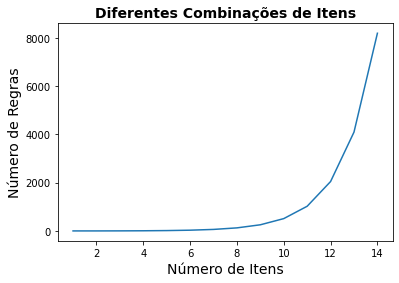

In [ ]:
# you can skip this code!

import scipy.special as s

x = np.arange(1,15)
C_nk = []

for n in range(len(x)): 
  soma = 0
  for k in range(1,n):
    soma = soma + s.factorial(n)/(s.factorial(k)*s.factorial(n-k))
  C_nk.append(soma)

plt.plot(x,np.array(C_nk))
plt.title('Diferentes Combinações de Itens', fontsize=14, weight='bold')
plt.xlabel('Número de Itens', fontsize=14)
plt.ylabel('Número de Regras', fontsize=14)
plt.show()

In [ ]:
from itertools import permutations
k = 2
p = list(permutations(['Tomada','Furadeira','Broca','Bateria'],2))

p

[('Tomada', 'Furadeira'),
 ('Tomada', 'Broca'),
 ('Tomada', 'Bateria'),
 ('Furadeira', 'Tomada'),
 ('Furadeira', 'Broca'),
 ('Furadeira', 'Bateria'),
 ('Broca', 'Tomada'),
 ('Broca', 'Furadeira'),
 ('Broca', 'Bateria'),
 ('Bateria', 'Tomada'),
 ('Bateria', 'Furadeira'),
 ('Bateria', 'Broca')]

Já já você vai descobrir que são diferentes as regras:

> **Bateria → Furadeira**

> **Furadeira → Bateria**

# Métricas e poda 

As métricas são medidas de desempenho para regras e irão servir para selecionarmos as métricas mais importantes e úteis das demais.

> **{humor} → {poesia}**, métrica = 0,85

> **{ficção} → {viagem}**, métrica = 0,25

Se temos as métricas acima e definimos um *threshold*, limite mínimo, de 0.5 para essa métrica de desempenho vamos:

> Manter: **{humor} → {poesia}**

> Descartar: **{ficção} → {viagem}**


# Suporte

A métrica mais simples é o *Suporte* e o compartilhamento de transações que contêm um conjunto de itens.

$$ Support(X)= \frac{ freq(X) }{N} $$
$$ Support(X→Y)=\frac{ freq(X \cap Y) }{ N } $$

Ela é uma medida de quão frequente a regra é no domínio das transações.



# Confiança
Esta métrica mede a frequência com que os itens em Y aparecem em transações que contêm X e é dado pela fórmula.

$$ Confidence( X→ Y) = \frac{Support( X→ Y)}{Support( X)} $$



E agora já podemos entender que as regras abaixo são de fato diferentes:

> **R1** = Bateria → Furadeira

> **R2** = Furadeira → Bateria

Pois teremos 

$$S = Support(Bateria → Furadeira) = Support(Furadeira → Bateria) = \frac{ freq(Furadeira \cap Bateria) }{ N } $$

mas havendo quantidades diferentes de ocorrências de cada produto, isto é, 

$$Support(Bateria) \neq Support(Furadeira)$$ 

teremos,  

$$Confidence( Bateria → Furadeira) = \frac{S}{Support(Bateria)} $$
$$\neq$$ $$\frac{S}{Support(Furadeira)} = Confidence(Furadeira →  Bateria)$$



O significado por trás dessa métrica é a fração em que se a premissa da regra ocorre a conclusão também irá ocorrer.

# Elevação ou Lift

Esse valornos informa a probabilidade de o item Y ser comprado junto com o item X com relação ao que poderíamos supor apenas avaliando os valores de suporte individuais. 

$$ Lift( X→ Y) = \frac{ Support( X→ Y)} {Support( X) × Support( Y)}$$

$ Lift() > 1 $ diz que os dois itens ocorrem em transações conjuntas com mais frequência do que esperaríamos com base em seus valores de suporte individuais. Isso significa que é improvável que a relação seja explicada por acaso e esse limite natural é conveniente para fins de filtragem.

$ Lift() < 1 $ diz que os dois itens são emparelhados com menos frequência nas transações do que esperaríamos se os emparelhamentos ocorressem por acaso.

# Regras de Associação *not in*  `scikit-learn`

As regras de associação permanecem fora das tarefas principais nas quais o `scikit-learn` se concentra e não se ajusta perfeitamente à API. Os pacotes mais comumente empregados são hoje o [mlxtend](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/) e o [apyori](https://pypi.org/project/apyori/). 

Diferentemente do `scikit-learn` esses pacotes normalmente não se encontram previamente instalados e você precisa instalar os pacotes antes de empregá-los.

# Preparação dos dados

Como em outros processos de análise de dados muitas vezes a maior parte do trabalho se concentra na *Preparação dos Dados* para empregar nos modelos. 

Veja abaixo as diferentes organizações de dados para os pacotes [mlxtend](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/) e o [apyori](https://pypi.org/project/apyori/). O primeiro emprega uma tabela de transações dos items, em que cada item participante de uma transação aparece com 1 ou TRUE. Já o segundo cada transação corresponde a uma lista de itens. 

## Install Packages

In [ ]:
!pip install apyori 

In [ ]:
!pip install mlxtend

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', 130)

# Um exemplo de Brinquedo

## Dados Originais

Eles podem diferir muito e normalmente várias transformações precisam ser empregadas para se chegar ao formato de aplicação nos modelos.

In [ ]:
invoice_nr = [101,201,201,302,302,421]
product_name = ['Tomada','Furadeira','Broca','Furadeira','Bateria','Interruptor']
product_qty = [5,3,8,4,4,5]

invoices = pd.DataFrame({'invoice_nr':invoice_nr,
                         'product_name':product_name,
                         'product_qty':product_qty})

invoices

,invoice_nr,product_name,product_qty
0,101,Tomada,5
1,201,Furadeira,3
2,201,Broca,8
3,302,Furadeira,4
4,302,Bateria,4
5,421,Interruptor,5


## Criando a Tabela de Transações

In [ ]:
transactions = pd.pivot_table(data=invoices, index='invoice_nr', columns='product_name', values='product_qty', 
                              aggfunc='sum',fill_value=0) # .reset_index()  
transactions.columns.name = ''
transactions.head()

,Bateria,Broca,Furadeira,Interruptor,Tomada
invoice_nr,,,,,
101,0,0,0,0,5
201,0,8,3,0,0
302,4,0,4,0,0
421,0,0,0,5,0


In [ ]:
transactions = transactions.applymap(lambda x: 0 if x == 0 else 1) # use transactions[transactions.columns[0::]] se empregar .reset_index()  
transactions

,Bateria,Broca,Furadeira,Interruptor,Tomada
invoice_nr,,,,,
101,0,0,0,0,1
201,0,1,1,0,0
302,1,0,1,0,0
421,0,0,0,1,0


## Aplicando o `mlxtend`


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Construindo o modelo
frq_items = apriori(transactions, min_support = 0.05, use_colnames = True)
 
# Coletando as regras de inferência em um dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())

   antecedents  consequents  antecedent support  consequent support  support  \
1    (Bateria)  (Furadeira)                0.25                0.50     0.25   
2      (Broca)  (Furadeira)                0.25                0.50     0.25   
0  (Furadeira)    (Bateria)                0.50                0.25     0.25   
3  (Furadeira)      (Broca)                0.50                0.25     0.25   

   confidence  lift  leverage  conviction  
1         1.0   2.0     0.125         inf  
2         1.0   2.0     0.125         inf  
0         0.5   2.0     0.125         1.5  
3         0.5   2.0     0.125         1.5  


## Aplicando o `apyori`

O `apyori` é um pacote mais simples e cada transações é representada por uma lista de itens.

In [ ]:
transactions_apriori = []

for index, row in transactions.iterrows():
  t = []
  for c in row.index:
    if row[c] > 0:
      t.append(c)
  transactions_apriori.append(t) 

transactions_apriori  

[['Tomada'], ['Broca', 'Furadeira'], ['Bateria', 'Furadeira'], ['Interruptor']]

In [ ]:
from apyori import apriori  

frq_items = apriori(transactions_apriori,min_support=0.05,min_confidance=0.2,min_lift=2,min_length=2)

rules = pd.DataFrame(list(frq_items))
print(rules.head())

                  items  support  \
0  (Furadeira, Bateria)     0.25   
1    (Broca, Furadeira)     0.25   

                                  ordered_statistics  
0  [((Bateria), (Furadeira), 1.0, 2.0), ((Furadei...  
1  [((Broca), (Furadeira), 1.0, 2.0), ((Furadeira...  


# CASO: UK Online Retail Data Set

Este é um conjunto de dados transacionais que contém cerca de 500K transações ocorridas entre 01/12/2010 e 09/12/2011 para uma rede de varejo online com sede no Reino Unido.

Fonte: http://archive.ics.uci.edu/ml/datasets/Online+Retail

Vamos assim empregar a Mineração de Regras de Associação para buscar produtos normalmente consumidos juntos.



## Exploração e Preparação dos Dados

In [ ]:
df = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.shape

(541909, 8)

In [ ]:
df.Description.nunique() 

4223

As operações foram realizadas em diferentes países, incluindo o Brasil.

In [ ]:
df.Country.value_counts()[0:10]

United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         2002
Portugal            1519
Australia           1259
Name: Country, dtype: int64

Mas há um único `invoice` com $32$ itens para o Brasil neste período.

In [ ]:
df[ df.Country == 'Brazil' ].Country.value_counts()

Brazil    32
Name: Country, dtype: int64

In [ ]:
df[ df.Country == 'Brazil' ].Country.value_counts('InvoiceNo')

Brazil    1.0
Name: Country, dtype: float64

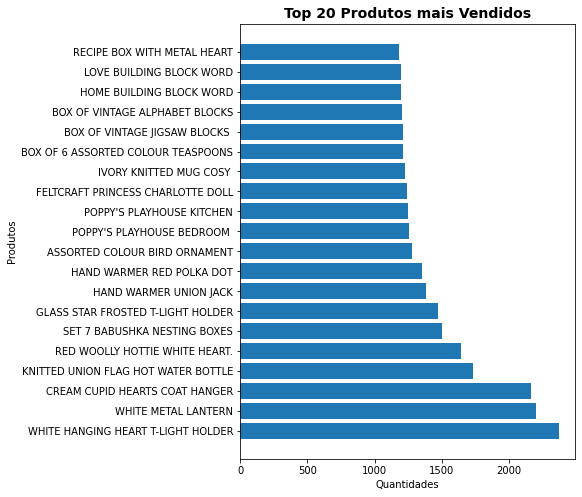

In [ ]:
plt.figure(figsize=(6,8))
n = 20
plt.barh(df.Description[0:n], df.Description.value_counts()[0:n])
plt.title('Top ' + str(n) + ' Produtos mais Vendidos', fontsize=14, weight='bold')
plt.xlabel('Quantidades')
plt.ylabel('Produtos')
plt.show()

In [ ]:
df.Description.value_counts()[0:10]

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: Description, dtype: int64

Por hora vamos apenas eliminar valores ausentes em atributos que nos interessam.

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df = df.dropna(axis = 0, subset =['Description'])
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

Vamos excluir também operações feitas com crédito (devoluções, a descrição disso encontra-se na documentação dos dados):

In [ ]:
len(df)

540455

In [ ]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]
len(df)

531167

## Criando a Tabela de Transações

Nós vamos aqui emprear o pacote `mlxtend` e portanto precisamos construir a tabela de transações. Vamos trabalhar somente com os dados de um país apenas para reduzir a quantidade de dados neste exemplo.

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
transactions_FR = pd.pivot_table(data=df[ df.Country == 'France'], index='InvoiceNo', columns='Description', values='Quantity', 
                              aggfunc='sum',fill_value=0) # .reset_index()  
transactions_FR.columns.name = ''
transactions_FR.head()

,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,15CM CHRISTMAS GLASS BALL 20 LIGHTS,16 PIECE CUTLERY SET PANTRY DESIGN,18PC WOODEN CUTLERY SET DISPOSABLE,20 DOLLY PEGS RETROSPOT,200 RED + WHITE BENDY STRAWS,3 HOOK HANGER MAGIC GARDEN,3 PIECE SPACEBOY COOKIE CUTTER SET,3 RAFFIA RIBBONS 50'S CHRISTMAS,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN RED AND CREAM,3 TRADITIONAl BISCUIT CUTTERS SET,36 DOILIES DOLLY GIRL,36 DOILIES VINTAGE CHRISTMAS,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE SKULLS,36 PENCILS TUBE WOODLAND,3D DOG PICTURE PLAYING CARDS,3D HEARTS HONEYCOMB PAPER GARLAND,3D SHEET OF DOG STICKERS,3D TRADITIONAL CHRISTMAS STICKERS,3D VINTAGE CHRISTMAS STICKERS,4 IVORY DINNER CANDLES SILVER FLOCK,4 PINK DINNER CANDLE SILVER FLOCK,4 TRADITIONAL SPINNING TOPS,5 HOOK HANGER MAGIC TOADSTOOL,5 HOOK HANGER RED MAGIC TOADSTOOL,6 GIFT TAGS 50'S CHRISTMAS,6 GIFT TAGS VINTAGE CHRISTMAS,6 RIBBONS EMPIRE,6 RIBBONS RUSTIC CHARM,6 ROCKET BALLOONS,60 CAKE CASES DOLLY GIRL DESIGN,60 CAKE CASES VINTAGE CHRISTMAS,60 TEATIME FAIRY CAKE CASES,6PC WOOD PLATE SET DISPOSABLE,72 SWEETHEART FAIRY CAKE CASES,A PRETTY THANK YOU CARD,ABC TREASURE BOOK BOX,ADULT APRON APPLE DELIGHT,ADVENT CALENDAR GINGHAM SACK,AGED GLASS SILVER T-LIGHT HOLDER,AIRLINE BAG VINTAGE JET SET BROWN,AIRLINE BAG VINTAGE JET SET RED,AIRLINE BAG VINTAGE JET SET WHITE,AIRLINE BAG VINTAGE TOKYO 78,AIRLINE BAG VINTAGE WORLD CHAMPION,...,WIRE EGG BASKET,WOOD BLACK BOARD ANT WHITE FINISH,WOOD STAMP SET BEST WISHES,WOOD STAMP SET FLOWERS,WOOD STAMP SET HAPPY BIRTHDAY,WOOD STAMP SET THANK YOU,WOODEN ADVENT CALENDAR CREAM,WOODEN ADVENT CALENDAR RED,WOODEN BOX OF DOMINOES,WOODEN CROQUET GARDEN SET,WOODEN HAPPY BIRTHDAY GARLAND,WOODEN HEART CHRISTMAS SCANDINAVIAN,WOODEN OWLS LIGHT GARLAND,WOODEN PICTURE FRAME WHITE FINISH,WOODEN REGATTA BUNTING,WOODEN ROUNDERS GARDEN SET,WOODEN SCHOOL COLOURING SET,WOODEN SKITTLES GARDEN SET,WOODEN STAR CHRISTMAS SCANDINAVIAN,WOODEN TREE CHRISTMAS SCANDINAVIAN,WOODEN UNION JACK BUNTING,WOODLAND HEIGHT CHART STICKERS,WOODLAND STICKERS,WOODLAND BUNNIES LOLLY MAKERS,WOODLAND CHARLOTTE BAG,WOODLAND DESIGN COTTON TOTE BAG,WOODLAND LARGE BLUE FELT HEART,WOODLAND LARGE PINK FELT HEART,WOODLAND LARGE RED FELT HEART,WOODLAND MINI BACKPACK,WOODLAND PARTY BAG + STICKER SET,WOODLAND SMALL BLUE FELT HEART,WOODLAND SMALL PINK FELT HEART,WOODLAND SMALL RED FELT HEART,WOODLAND STORAGE BOX LARGE,WOODLAND STORAGE BOX SMALL,WORLD WAR 2 GLIDERS ASSTD DESIGNS,WRAP VINTAGE DOILY,WRAP 50'S CHRISTMAS,WRAP ALPHABET DESIGN,WRAP CAROUSEL,WRAP CHRISTMAS VILLAGE,WRAP CIRCUS PARADE,WRAP DOILEY DESIGN,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP GINGHAM ROSE,WRAP GREEN PEARS,WRAP I LOVE LONDON,WRAP PAISLEY PARK,WRAP PINK FAIRY CAKES,WRAP POPPIES DESIGN,WRAP RED APPLES,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
transactions_FR.shape 

(392, 1564)

In [ ]:
transactions_FR = transactions_FR.applymap(lambda x: 0 if x == 0 else 1) # use transactions[transactions.columns[0::]] se empregar .reset_index()  
transactions_FR

,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,15CM CHRISTMAS GLASS BALL 20 LIGHTS,16 PIECE CUTLERY SET PANTRY DESIGN,18PC WOODEN CUTLERY SET DISPOSABLE,20 DOLLY PEGS RETROSPOT,200 RED + WHITE BENDY STRAWS,3 HOOK HANGER MAGIC GARDEN,3 PIECE SPACEBOY COOKIE CUTTER SET,3 RAFFIA RIBBONS 50'S CHRISTMAS,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN RED AND CREAM,3 TRADITIONAl BISCUIT CUTTERS SET,36 DOILIES DOLLY GIRL,36 DOILIES VINTAGE CHRISTMAS,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE SKULLS,36 PENCILS TUBE WOODLAND,3D DOG PICTURE PLAYING CARDS,3D HEARTS HONEYCOMB PAPER GARLAND,3D SHEET OF DOG STICKERS,3D TRADITIONAL CHRISTMAS STICKERS,3D VINTAGE CHRISTMAS STICKERS,4 IVORY DINNER CANDLES SILVER FLOCK,4 PINK DINNER CANDLE SILVER FLOCK,4 TRADITIONAL SPINNING TOPS,5 HOOK HANGER MAGIC TOADSTOOL,5 HOOK HANGER RED MAGIC TOADSTOOL,6 GIFT TAGS 50'S CHRISTMAS,6 GIFT TAGS VINTAGE CHRISTMAS,6 RIBBONS EMPIRE,6 RIBBONS RUSTIC CHARM,6 ROCKET BALLOONS,60 CAKE CASES DOLLY GIRL DESIGN,60 CAKE CASES VINTAGE CHRISTMAS,60 TEATIME FAIRY CAKE CASES,6PC WOOD PLATE SET DISPOSABLE,72 SWEETHEART FAIRY CAKE CASES,A PRETTY THANK YOU CARD,ABC TREASURE BOOK BOX,ADULT APRON APPLE DELIGHT,ADVENT CALENDAR GINGHAM SACK,AGED GLASS SILVER T-LIGHT HOLDER,AIRLINE BAG VINTAGE JET SET BROWN,AIRLINE BAG VINTAGE JET SET RED,AIRLINE BAG VINTAGE JET SET WHITE,AIRLINE BAG VINTAGE TOKYO 78,AIRLINE BAG VINTAGE WORLD CHAMPION,...,WIRE EGG BASKET,WOOD BLACK BOARD ANT WHITE FINISH,WOOD STAMP SET BEST WISHES,WOOD STAMP SET FLOWERS,WOOD STAMP SET HAPPY BIRTHDAY,WOOD STAMP SET THANK YOU,WOODEN ADVENT CALENDAR CREAM,WOODEN ADVENT CALENDAR RED,WOODEN BOX OF DOMINOES,WOODEN CROQUET GARDEN SET,WOODEN HAPPY BIRTHDAY GARLAND,WOODEN HEART CHRISTMAS SCANDINAVIAN,WOODEN OWLS LIGHT GARLAND,WOODEN PICTURE FRAME WHITE FINISH,WOODEN REGATTA BUNTING,WOODEN ROUNDERS GARDEN SET,WOODEN SCHOOL COLOURING SET,WOODEN SKITTLES GARDEN SET,WOODEN STAR CHRISTMAS SCANDINAVIAN,WOODEN TREE CHRISTMAS SCANDINAVIAN,WOODEN UNION JACK BUNTING,WOODLAND HEIGHT CHART STICKERS,WOODLAND STICKERS,WOODLAND BUNNIES LOLLY MAKERS,WOODLAND CHARLOTTE BAG,WOODLAND DESIGN COTTON TOTE BAG,WOODLAND LARGE BLUE FELT HEART,WOODLAND LARGE PINK FELT HEART,WOODLAND LARGE RED FELT HEART,WOODLAND MINI BACKPACK,WOODLAND PARTY BAG + STICKER SET,WOODLAND SMALL BLUE FELT HEART,WOODLAND SMALL PINK FELT HEART,WOODLAND SMALL RED FELT HEART,WOODLAND STORAGE BOX LARGE,WOODLAND STORAGE BOX SMALL,WORLD WAR 2 GLIDERS ASSTD DESIGNS,WRAP VINTAGE DOILY,WRAP 50'S CHRISTMAS,WRAP ALPHABET DESIGN,WRAP CAROUSEL,WRAP CHRISTMAS VILLAGE,WRAP CIRCUS PARADE,WRAP DOILEY DESIGN,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP GINGHAM ROSE,WRAP GREEN PEARS,WRAP I LOVE LONDON,WRAP PAISLEY PARK,WRAP PINK FAIRY CAKES,WRAP POPPIES DESIGN,WRAP RED APPLES,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

## Aplicando o `mlxtend`


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Construindo o modelo
frq_items = apriori(transactions_FR, min_support = 0.05, use_colnames = True)
 
# Coletando as regras de inferência em um dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())

                                           antecedents  \
45                        (JUMBO BAG WOODLAND ANIMALS)   
259  (RED TOADSTOOL LED NIGHT LIGHT, PLASTERS IN TI...   
271  (PLASTERS IN TIN WOODLAND ANIMALS, RED TOADSTO...   
302  (SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...   
301  (SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...   

                         consequents  antecedent support  consequent support  \
45                         (POSTAGE)            0.076531            0.765306   
259                        (POSTAGE)            0.051020            0.765306   
271                        (POSTAGE)            0.053571            0.765306   
302  (SET/6 RED SPOTTY PAPER PLATES)            0.102041            0.127551   
301    (SET/6 RED SPOTTY PAPER CUPS)            0.102041            0.137755   

      support  confidence      lift  leverage  conviction  
45   0.076531       1.000  1.306667  0.017961         inf  
259  0.051020       1.000  1.306667  0.011974     

A análise dos dados acima indica que copos, guardanapos e pratos de papel são comprados juntos na França e, de fato, os Franceses são conhecidos por fazer reuniões de amigos e familiares e há muitos anos a França proibiu os itens de plático para refeições.

Você ainda pode tentar fazer a análise revisando os dados. Note que existem muitos itens com `POSTAGE`, um item que pode ser óbvio no caso de entregas e que podemos eliminar antes de criarmos o conjunto de transações. 

```
df.drop('POSTAGE', inplace=True, axis=1)
```

Muitas outras operações como essas podem ser feitas selecionando e agrupando itens de produtos trantando as *strings* de nomes dos produtos, o que realmente é muitas vezes feito e necessário, mas não nos aprofundaremos nisso aqui.


## Uma Nova Análise

Podemos fazer ainda a mesma análise para a Inglaterra, que tem uma quantidade muito maior de dados. Note que aqui vamos ter de abaixar o `min_support` pois, se empregarmos o mesmo valor que empregamos na análise anterior, não restaram regras!

In [ ]:
transactions_UK = pd.pivot_table(data=df[ df.Country == 'United Kingdom'], index='InvoiceNo', columns='Description', values='Quantity', 
                              aggfunc='sum',fill_value=0) # .reset_index()  
transactions_UK.columns.name = ''
transactions_UK = transactions_UK.applymap(lambda x: 0 if x == 0 else 1) # use transactions[transactions.columns[0::]] se empregar .reset_index()  
transactions_UK.shape

(18668, 4188)

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Construindo o modelo
frq_items = apriori(transactions_UK, min_support = 0.01, use_colnames = True)
 
# Coletando as regras de inferência em um dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())

                                       antecedents             consequents  \
117           (BEADED CRYSTAL HEART PINK ON STICK)        (DOTCOM POSTAGE)   
2012  (JAM MAKING SET PRINTED, SUKI  SHOULDER BAG)        (DOTCOM POSTAGE)   
2288         (HERB MARKER THYME, HERB MARKER MINT)  (HERB MARKER ROSEMARY)   
2292   (HERB MARKER PARSLEY, HERB MARKER ROSEMARY)     (HERB MARKER THYME)   
2293      (HERB MARKER PARSLEY, HERB MARKER THYME)  (HERB MARKER ROSEMARY)   

      antecedent support  consequent support   support  confidence       lift  \
117             0.011035            0.037926  0.010767    0.975728  25.727250   
2012            0.011624            0.037926  0.011196    0.963134  25.395168   
2288            0.010714            0.012374  0.010231    0.955000  77.177229   
2292            0.011088            0.012321  0.010553    0.951691  77.244192   
2293            0.011088            0.012374  0.010553    0.951691  76.909802   

      leverage  conviction  
117   0.010349 

<img src="https://acultivatednest.com/wp-content/uploads/2013/06/creative-plant-marker-ideas-500px.jpg"  width=300, align="center">


<br>
<small>
<b>
Figura 2. Produtos frequentemente consumidos juntos. <br></b>(Fonte: https://acultivatednest.com/wp-content/uploads/2013/06/creative-plant-marker-ideas-500px.jpg) 

Aparentemente os britânicos costumam comprar vários *herb markers* diferentes juntos e, portanto, um fornecedor ou fabricante precisa ter uma grande diversidade desses itens para atrair os seus clientes.

# Outras métricas Leverage e Conviction

Você deve ter notado que aparecem outras métricas ao empregar o pacote `mlxtent`. A métrica de alavancagem ou *leverage* também se baseia no suporte. Ela é semelhante à elevação, mas normalmente é mais fácil de interpretar.

$$ Leverage(X→Y)=Support(X \cap Y)−Support(X)Support(Y)$$
 
A alavancatem é um valor entre $- 1$  e  $+ 1$ enquanto a elevação (lift) varia de  $0$  ao infinito sendo o ponto de corte $1$.

A convicção ou *conviction* traz a mesma ideia da elevação e da alavancagem, mas é mais complicada e bastante menos intuitiva. 

$$Conviction(X→Y)=Support(X)Support(\bar{Y})Support(X \cap \bar{Y})$$

onde $\bar{Y}$ indica o complemento de $Y$.

# Como Funciona? O Princípio Apriori

A descoberta de regras de associação é um problema que pode ser definido como: Dado um conjunto de transações T, encontre todas as regras com suporte ≥ minsup e confiança ≥ minconf (onde minsup e minconf são os correspondentes limiares de suporte de confiança). Você ainda pode ordenar esses valores em ordem descrescente de elevação, alavancagem ou convicção. 

Existem algumas técnicas para fazermos esses filtros de regras, mas a técnica mais comum é conhecida como **Apriori** que emprega a medida de suporte para reduzir o número de conjuntos de itens candidatos explorados durante a geração dos conjuntos frequentes de itens. Essa técnica é orientada pelo seguinte princípio:

> Teorema (**Princípio Apriori**). Se um conjunto de itens é frequente, então todos os seus
os subconjuntos também devem ser frequentes.


![imagem](https://github.com/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/blob/main/figuras/associationrules1.png?raw=true)

<br>
<small>
<b>
Figura 3. Árvore com as diferentes Associações possíveis e a escolha dos ramos com Associações mais frequentes (algoritmo <i>Apriori</i>). <br> </b>
(Fonte: Tan, P.-N., Steinbach, M.,, Kumar, V. (2005). Introduction to Data Mining)

![imagem](https://github.com/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/blob/main/figuras/associationrules2.png?raw=true)

<br>
<small>
<b>
Figura 4. Árvore com as diferentes Associações possíveis e a remoção dos ramos com Associações menos frequentes (algoritmo <i>Apriori</i>). <br> </b>
(Fonte: Tan, P.-N., Steinbach, M.,, Kumar, V. (2005). Introduction to Data Mining)

O algoritmo abaixo é um pseudo código de implementação do algoritmo **Apriori** e o esquema a seguir ilustra como refinamos as regras possíveis a partir do suporte das regras com o algoritmo.

![imagem](https://github.com/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/blob/main/figuras/associationrules4.png?raw=true)

<br>
<small>
<b>
Figura 5. Pseudo Código do Algoritmo <i>Apriori</i>. <br> </b>
(Fonte: Tan, P.-N., Steinbach, M.,, Kumar, V. (2005). Introduction to Data Mining)

![imagem](https://github.com/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/blob/main/figuras/associationrules3.png?raw=true)

<br>
<small>
<b>
Figura 6. Seleção dos items mais frequentemente associados com o algoritmo <i>Apriori</i>.<br></b>(
Fonte: Tan, P.-N., Steinbach, M.,, Kumar, V. (2005). Introduction to Data Mining)

Existem muitos outros algoritmos de busca de regras de associação que buscam otimizar e tornar mais eficiente a busca de regras de interesse. Mas o conceito é o mesmo, o de filtrar empregando critérios de desempenho das regras, e para os nossos propósitos o entendimento dos conceitos do **Apriori** são bastante suficientes.

# Filtros de Conteúdo para Sistemas de Recomendação

Sistemas de Recomendação são bastante empregados no comércio eletrônico e você já deve ter recebido recomendações em um site de compras como a Amazon, ou ainda plataformas de conteúdo como o Spotify e NetFlix.

Em geral os Sistemas de Recomendação empregam dados dos usuários, itens e  feedback implícito (como o fato de tê-los comprado) ou explícito (como a avaliação ou ranking dos produtos para sugerir itens mais adequados ou prever a avaliação para todos os itens ainda não avaliados.




# Abordagens

Os sistemas de recomendação podem ser subdivididos em três categorias: 

* Sistemas baseados em conteúdo (Content-based filtering) 
* Sistemas de filtragem colaborativa (Collaborative filtering)
* Sistemas híbridos (que usam uma combinação dos outros dois)

A primeira abordagem baseia-se nas informações dos usuários ou dos produtos. A ideia é associar a um usuário a um grupo de usuários semelhantes para sugerir todos os itens bem avaliados pelos outros usuários, ou agrupar os produtos de acordo com suas características e propor um subconjunto de produtos semelhantes aos já consumidos pelo usuário. 

A segunda abordagem é mais sofisticada. Ela trabalha com classificações explícitas dos itens de cada usuário para prever esse valor para cada novo par item-usuário. Ela requer muito mais poder computacional (pense em todos os pares possíveis item-usuário), mas essa é a abordagem empregada hoje pela  maior parte dos sistemas de recomendação em tempo real (de modo híbrido) podendo o modelo ser retreinado ou atualizado diariamente. 

Os sistemas híbridos combinam resultados dos dois modelos e você pode imaginar muitas outras combinações combinando popularidade dos produtos, regras de associação etc.

Os sistemas mais atuais de recomendação implementam em geral Filtros Colaborativos, combinando ainda muitas outras técnicas. Eles são mais sofisticados que os Filtros de Conteúdo que veremos aqui, mas ao final o principal conceito está em buscar similaridades entre vetores característicos.




# CASO: Spotify Music Recommendation

Vamos considerar aqui um pequeno conjunto de dados com características sonoras de músicas empregados pelo Spotify e empregar dados fictícios de usuários, e seus acessos às músicas, para construir aqui modelos de Sistemas de Recomendação baseados em Filtros de Contéudo de Itens e Usuários.

In [ ]:
#@markdown You can skip this code!
import random

items = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/recommendation_spotify_items.csv',index_col=0,nrows=1000) # Lê somente 100 primeiros
random.seed(1984)
items = items.iloc[ sorted(random.sample(range(len(items)), 20)) ].reset_index() # Seleciona somente 20 itens
items = items.rename(columns={'index':'song_id'})

print('\n\nSong items: items')
print(180*'-')
display( items.head(4) )
print('\nitems.shape: ',items.shape)

users = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/recommendation_users.csv',nrows=100,usecols=['ID', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']) # Lê somente 100 primeiros
random.seed(1984)
users = users.iloc[ sorted(random.sample(range(len(users)), 10)) ].reset_index(drop=True) # Seleciona somente 10 users

print('\n\nUsers: users')
print(180*'-')
display( users.head(4) )
print('\nusers.shape: ',users.shape)

transactions = pd.DataFrame({'ID':[],'song_id':[]})
random.seed(1984)
for _ , row in users.iterrows():
  n_items = random.randint(1,4) # max 4 itens por usuário
  for item in random.sample(set(items.song_id), n_items):
    transactions = pd.concat([transactions, pd.DataFrame({'ID':[row.ID],'song_id':[item]})]) 

transactions.reset_index(drop=True,inplace=True)
for c in transactions: transactions[c] = transactions[c].astype('int')

print('\n\nTransactions: transactions')
print(180*'-')
display( transactions.head(4) )
print('\ntransactions.shape: ',transactions.shape)





Song items: items
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,song_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,51,0.0638,0.700,224480,0.840,0.112000,7,0.1410,-6.227,0,0.0292,132.475,4.0,0.745,1,The Chase,Future Islands
1,72,0.5180,0.683,155133,0.708,0.000021,4,0.1750,-6.852,0,0.0289,106.446,4.0,0.967,1,Spooky,Dusty Springfield
2,176,0.1410,0.500,256093,0.593,0.000006,1,0.0969,-4.340,1,0.0898,68.456,4.0,0.325,1,New Slaves,Kanye West
3,221,0.0696,0.512,287147,0.821,0.330000,9,0.0998,-7.442,0,0.0334,149.988,4.0,0.396,1,Light House,Future Islands



items.shape:  (20, 17)


Users: users
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,ID,SEX,EDUCATION,MARRIAGE,AGE
0,10,1,3,2,35
1,28,2,3,2,30
2,32,1,2,2,33
3,40,1,1,2,31



users.shape:  (10, 5)


Transactions: transactions
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,ID,song_id
0,10,869
1,10,72
2,10,826
3,28,347



transactions.shape:  (26, 2)


## Popularidade

Apenas para destacar, o sistema mais ingênuo de recomendação pode simplesmente recomendar a todos os usuários o produto mais vendido. É o critério da popularidade.

In [ ]:
transactions.song_id.value_counts().max()

4

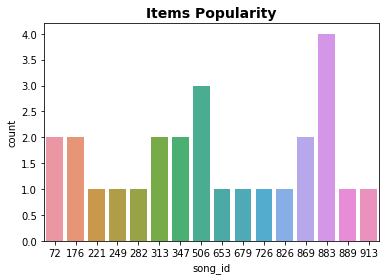

In [ ]:
sns.countplot(x=transactions.song_id)
plt.title('Items Popularity', fontsize=14, weight='bold')
plt.show()

In [ ]:
transactions.song_id.mode()[0]

883

In [ ]:
print('Suggested items:')
print(items[ items.song_id == transactions.song_id.mode()[0] ][ ['song_title','artist'] ])

Suggested items:
                            song_title        artist
17  Something About You - Extended Mix  Hayden James


Embora ainda empregado, esse tipo de recomendação talvez tenha pouca efetividade, e não personaliza a recomendação para qualquer usuário. De fato, há muito pouca inteligência nessa forma de recomendação.

# Filtro de Conteúdo por Usuário

Podemos obter algo melhor buscando produtos positivamente avaliados ou que são mais comprados por usuários que sejam *semelhantes* ao usuário que queremos fazer uma recomendação. Para encontrar esses usuários *semelhantes* podemos empregar uma aprendizagem não supervisionada de vizinhos mais próximos, e é o que fazemos a seguir com a função `NearestNeighbors` e você deve ter cuidado para não confundir com o classificador de k-vizinhos mais próximos (`KNeighborsClassifier`). O classificador é um modelo supervisionado enquanto, aqui, empregamos um modelo mais próximo da clusterização, um modelo não supervisionado. 

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Fit k-nearest neighbors
X = users.drop(columns='ID')

n_neighbors = 3 

knn = NearestNeighbors(n_neighbors=n_neighbors+1)
knn.fit(X)

# Select a user
random.seed(1894)
print('\nEscolha de um user aleatório...')
user_selected = users[ users.ID == random.sample(set(users.ID), 1)[0] ].drop(columns='ID')

# Determine the neighbors
d, neighbors = knn.kneighbors(user_selected)
neighbors = neighbors[0][1::] 
d = d[0][1::] 

neighbors_ids = users.iloc[ neighbors ].ID

print('\nuser_selected:')
print(user_selected)
# print('\nNeighbors:')
# print(neighbors)
# print('\nDistance:')
# print(d)
print('\nNeighbors_ids:')
print(neighbors_ids,'\n')

    


Escolha de um user aleatório...

user_selected:
   SEX  EDUCATION  MARRIAGE  AGE
8    2          1         2   26

Neighbors_ids:
6    50
5    47
1    28
Name: ID, dtype: int64 



**CUIDADO** Note que empregamos $k+1$ vizinhos e eliminamos o primeiro encontrado. Experimente modificar o programa acima e explicar, por quê?

Double-click **aqui** para ver a resposta.
<!-- Resposta:

O primeiro vizinho mais próximo é o próprio elemento com distância zero. Lembre-se que poderiam haver elementos idênticos queremos eliminar apenas o próprio elemento. Aqui, por simplicidade e não havendo elementos idênticos podemos apenas eliminar o primeiro da lista.
-->

Com base nos usuários semelhantes que você obteve podemos buscar os itens adquiridos por eles e sugerir esses produtos ao usuário selecionado.

In [ ]:
# Determine the suggested items
suggested_items = []

for u in neighbors_ids:
  for item in transactions[ transactions.ID == u ].song_id:
     if item not in suggested_items:
          suggested_items.append(item)

print('Suggested items:')
print(suggested_items)
print()
print('Suggested items:')
print(items[ items.song_id.isin(suggested_items) ][ ['song_title','artist'] ])


Suggested items:
[313, 889, 221, 726, 506, 347, 913]

Suggested items:
                                          song_title          artist
3                                        Light House  Future Islands
6                                     Had Ten Dollaz  Cherry Glazerr
7                                           Pacifier      Young Thug
10                               The Kids Were Wrong     Memoryhouse
13                                              Open            Rhye
18                                    All I Wanna Do  The Beach Boys
19  Bizarre Love Triangle - Shep Pettibone 12" Remix       New Order


E poderíamos ainda aplicar outros filtros como, por exemplo, estabelecer um número mínimo de vezes que a música foi ouvida pelos usuários, as mais recentemente ouvidas ou de artistas que já tenham sido ouvidos pelo usuário selecionado. As possibilidades são inúmeras.

# Filtro de Conteúdo por Item

No Filtro de Conteúdo por Usuário buscamos usuários semelhantes e, então, selecionamos itens desses usuários para sugerir itens a um usuário selecionado. Podemos também buscar diretamente itens semelhantes aos que foram consumidos pelo usuário selecionado aplicando a mesma técnica de empregar uma aprendizagem não supervisionada de vizinhos mais próximos, com a função `NearestNeighbors`.

Essas são as caraterísticas de uma música, um item consumido:

In [ ]:
items.columns

Index(['song_id', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

E podemos definir um item consumido por um usuário, uma música recentemente ou ouvida, ou podemos ainda querer sugerir músicas semelhantes a todos os usuários que tenham ouvido uma determinada faixa.


In [ ]:
users.iloc[8]

ID           82
SEX           2
EDUCATION     1
MARRIAGE      2
AGE          26
Name: 8, dtype: int64

In [ ]:
print('\nEscolha da primeira faixa do usuário anterior...\n')
item_selected = items[ items.song_id == transactions[ transactions.ID == users.iloc[8].ID ].song_id.values[0] ]
  
item_selected


Escolha da primeira faixa do usuário anterior...



,song_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
17,883,0.198,0.89,326318,0.52,0.273,2,0.0638,-6.927,0,0.187,114.959,4.0,0.717,1,Something About You - Extended Mix,Hayden James


In [ ]:
from sklearn.neighbors import NearestNeighbors

# Fit k-nearest neighbors
X = items[['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']]

n_neighbors = 3 

# metrics = ['euclidean', 'hamming', 'jaccard']
knn = NearestNeighbors(n_neighbors=n_neighbors+1, radius=2.0) # , metrics = metrics[0]
knn.fit(X)

# Select a song from a user
random.seed(1894)
item_selected = items[ items.song_id == transactions[ transactions.ID == random.sample(set(users.ID), 1)[0] ].song_id.values[0] ]
item_selected = item_selected[['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']]

# Determine the neighbors
d, neighbors = knn.kneighbors(item_selected)
neighbors = neighbors[0][1::] 
d = d[0][1::] 

neighbors_ids = items.iloc[ neighbors ].song_id

print('\nuser_selected:')
print(user_selected)
# print('\nNeighbors:')
# print(neighbors)
# print('\nDistance:')
# print(d)
print('\nNeighbors_ids:')
print(neighbors_ids)

    


user_selected:
   SEX  EDUCATION  MARRIAGE  AGE
8    2          1         2   26

Neighbors_ids:
16    869
15    826
3     221
Name: song_id, dtype: int64


Agora os vizinhos são escolhidos entre as faixas, os itens, e selecionamos as faixas próximas.

In [ ]:
# Determine the suggested items
suggested_items2 = neighbors_ids

print('Suggested items:')
print(suggested_items2)
print()
print('Suggested items:')
print(items[ items.song_id.isin(suggested_items2) ][ ['song_title','artist'] ])


Suggested items:
16    869
15    826
3     221
Name: song_id, dtype: int64

Suggested items:
                         song_title            artist
3                       Light House    Future Islands
15               Living Every Dream            Antwon
16  Nobodys Fool - Ben Pearce Remix  Real Connoisseur


# Mixed...

Novamente as possibilidades de filtros são muitas. Você pode por exemplo estabelecer um número mínimo de ouvintes para recomendar uma faixa, ou empregar faixas mais recentes. Apenas para ilustrar essas inúmeras possibilidades vamos fazer a intersecção dos filtros de usuário e de conteúdo que fizemos antes.

In [ ]:
# Determine the suggested items
suggested_items3 = set(suggested_items).intersection(set(suggested_items2))

print('Suggested items:')
print(suggested_items3)
print()
print('Suggested items:')
print(items[ items.song_id.isin(suggested_items3) ][ ['song_title','artist'] ])

Suggested items:
{221}

Suggested items:
    song_title          artist
3  Light House  Future Islands


Que é uma faixa que não está na lista das ouvidas do usuário selecionado! Ótima recomendação!!!

In [ ]:
transactions[ transactions.ID == 82 ]

,ID,song_id
21,82,883
22,82,249
23,82,506


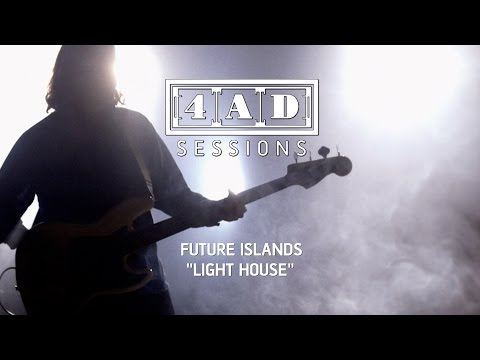

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('VFUZDXIRdlo')

<br>
<small>
<b>
Figura 7. Música sugerida no nosso exemplo de sistema de recomendação a partir de dados do Spotify: Future Islands, da Banda Light House.<br></b> Fonte: YouTubeVideo('VFUZDXIRdlo').

# Síntese

Nesta trilha como empregar a Mineração de Regras de Associação para compor *cestas de itens* frequentemente encontrados juntos. Esses sistemas, assim como os sistemas de recomendação, têm um papel importante no comércio eletrônico em geral e é onde se popularizaram, mas podem ser empregados em muitos outros contextos (por exemplo, na gestão e logística de estoques ou para encontrar associações de diferentes fatores a uma doença), e você aprendeu aqui como construir e avaliar regras de associação com diferentes métricas.

Os sistemas de recomendação também desempenham um papel essencial no comércio eletrônico. Aqui você explorou a técnica de Filtros de Conteúdo, baseados em Itens e Usuários. São técnicas simples, mas efetivas, baseados na busca vetores de características semelhantes (vizinhos mais próximos de modo não supervisionado). Algoritmos no estado da arte de sistemas de recomendação podem ser encontrados operando em sites como NetFlix, Amazon e  Spotify, e empregam em geral técnicas mais elaboradas com Filtros Colaborativos. Mas esses sistemas são em geral bastante complexos e fazem uso de  diversas técnicas conjuntas, incluindo Filtros de Conteúdo. 




# Para Saber Mais

* Para saber mais sobre regras de associação e seus diferentes algoritmos acesse Tan, P.-N., Steinbach, M.,, Kumar, V. (2005). **Introduction to Data Mining**, o **Capítulo 5 - Análise de Associações** está disponível em: https://www-users.cse.umn.edu/~kumar001/dmbook/ch5_association_analysis.pdf

* Que tal explorar alguns importantes artigos com o estado da arte de Sistemas de Recomendação baseados em dados como da NetFlix, Yahoo e MovieLens? Acesse então **Recommendation Systems** Disponível em: https://paperswithcode.com/task/recommendation-systems

* Vamos entender sobre como empregar técnicas de Filtros Colaborativos? Acesse o artigo **Building A Book Recommender System – The Basics, kNN and Matrix Factorization** Disponível em: https://datascienceplus.com/building-a-book-recommender-system-the-basics-knn-and-matrix-factorization/ lá você vai poder comparar essa técnica com as técnicas de Filtros de Conteúdo que aprendeu aqui e também como fazer sua implementação em Python.

* Acesse **Prototyping a Recommender System Step by Step Part 1: KNN Item-Based Collaborative Filtering** artigo de Kevin Liao disponível em: https://towardsdatascience.com/prototyping-a-recommender-system-step-by-step-part-1-knn-item-based-collaborative-filtering-637969614ea para mais um exemplo de aplicação de Filtros baseados em Item e você pode ainda seguir na parte 2 da série de artigos.




# Referências

Castro, Leandro N.; Ferrari, Daniel G. **Introdução à mineração de dados: conceitos básicos, algoritmos e aplicações**. São Paulo: Saraiva, 2016.

Tan, P.-N., Steinbach, M.,, Kumar, V. (2005). **Introduction to Data Mining**. Addison Wesley. ISBN: 0321321367 e também o Book Site, Disponível em: https://www-users.cse.umn.edu/~kumar001/dmbook/index.php Acesso em: 16 de novembro de 2021. 

Schrage, M. **Recommendation Engines** (The MIT Press Essential Knowledge). The MIT Press. 2020.

Alpaydin, E. **Machine Learning** (The MIT Press Essential Knowledge). The MIT Press. 2019.

Koren, Y., Bell, R., & Volinsky, C. (2009). **Matrix Factorization Techniques for Recommender Systems**. Computer, 42(8), 30–37. doi:10.1109/mc.2009.263

Li, S. **Building A Book Recommender System – The Basics, kNN and Matrix Factorization** Disponível em: https://datascienceplus.com/building-a-book-recommender-system-the-basics-knn-and-matrix-factorization/ Acesso em: 16 de novembro de 2021. 

Tam, A. **Using Singular Value Decomposition to Build a Recommender System** Disponível em: https://www-users.cse.umn.edu/~kumar001/dmbook/index.php Acesso em: 16 de novembro de 2021. 

Larose, Chantal D.; Larose, Daniel T. **Data Science Using Python and R** Hoboken: Wiley, c2019. E-book (259 p.) (Wiley Series on Methods and Applications in Data Mining Ser.). ISBN 9781119526834 (electronic bk.). Disponível em: https://www3.mackenzie.br/biblioteca_virtual/index.php?tipoBiblio=ebookcentral&flashObg=n

Kotu, Vijay; Deshpande, Balachandre **Data Science: concepts and practice**. 2nd ed. Cambridge, [England]: Morgan Kaufmann, c2019. E-book (570 p.) ISBN 9780128147627 (electronic bk.). Disponível em: http://pergamum.mackenzie.br:8080/pergamumweb/vinculos/00003c/00003cef.jpg.


